# Implementing linear regression to predict Individual medical costs billed by health insurance using Scikit-learn

In [2]:
#import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  LabelEncoder
from sklearn.metrics import r2_score

# Import data

In [3]:
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Visualize data

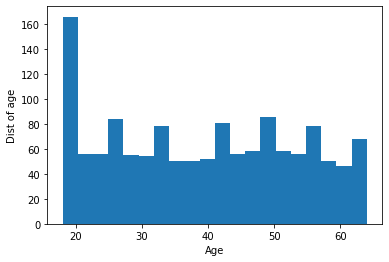

In [6]:
df['age'].plot(kind="hist",bins=20)
plt.xlabel("Age")
plt.ylabel("Dist of age")
plt.show()

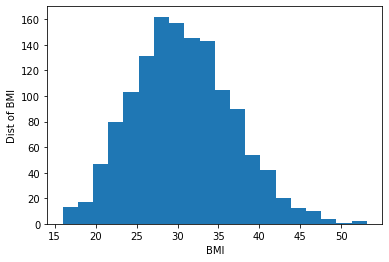

In [7]:
df['bmi'].plot(kind="hist",bins=20)
plt.xlabel("BMI")
plt.ylabel("Dist of BMI")
plt.show()

# Data Preparation

In [8]:
# convert string into numirc data values 
df['sex']=df['sex'].apply({'male':0,'female':1}.get)
df['smoker']=df['smoker'].apply({'yes':1,'no':0}.get)
df['region'] = df['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [9]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,4,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


In [10]:
#seperat train data from target 
x = df[['age','bmi', 'smoker']]
y = df[['charges']]

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Linear Regression

In [12]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [16]:
y_prediction=model.predict(x_test)

In [14]:
# accuracy
acc=r2_score(y_test,y_prediction)
acc

0.7945500805653087

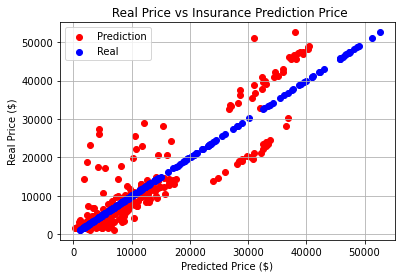

In [15]:
y_prediction=model.predict(x_test)

plt.scatter(y_prediction, y_test, c='red', label='Prediction')
plt.scatter(y_test, y_test, c='blue', label='Real')
plt.title(' Real Price vs Insurance Prediction Price')
plt.xlabel('Predicted Price ($)')
plt.ylabel('Real Price ($)')
plt.grid(True)
plt.legend()
plt.show()